In [1]:
import numpy as np
from math import pi
from gdshelpers.geometry.chip import Cell
from gdshelpers.parts.waveguide import Waveguide
from gdshelpers.parts.coupler import GratingCoupler

In [2]:
coupler_params = {
    'width': 5.0,
    'full_opening_angle': np.deg2rad(80),
    'grating_period': 1.5,
    'grating_ff': 0.85,
    'n_gratings': 50,
    'taper_length': 10.0
}

In [3]:
left_coupler = GratingCoupler.make_traditional_coupler(origin=(0, 0), **coupler_params)
wg = Waveguide.make_at_port(port=left_coupler.port)
wg.add_straight_segment(length=100)
wg.add_bend(angle=-pi / 2, radius=50)
wg.add_straight_segment(length=300)
wg.add_bend(angle=-pi / 2, radius=50)
wg.add_straight_segment(length=100)
right_coupler = GratingCoupler.make_traditional_coupler_at_port(port=wg.current_port, **coupler_params)

In [4]:
cell = Cell('SIMPLE_DEVICE')
cell.add_to_layer(1, left_coupler, wg, right_coupler)

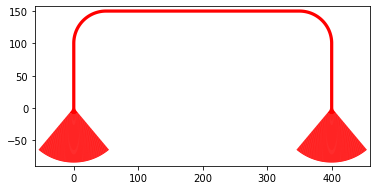

In [5]:
cell.show()


In [6]:
#cell.save('chip.gds')